In [ ]:
%pip install textstat
%pip install wordcloud
%pip install textblob
%pip install missingno
%pip install joblib
%pip install spacy
%pip install nltk
%pip install gensim
%pip install protobuf==3.20.*
%pip install nbformat

In [2]:
%pip install -U scikit-learn scipy matplotlib

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/9.2 MB 8.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/9.2 MB 9.6 MB/s eta 0:00:01
     ------ --------------------------------- 1.4/9.2 MB 11.1 MB/s eta 0:00:01
     --------- ------------------------------ 2.2/9.2 MB 12.7 MB/s eta 0:00:01
     -------------- ------------------------- 3.2/9.2 MB 14.7 MB/s eta 0:00:01
     ------------------- -------------------- 4.5/9.2 MB 16.7 MB/s eta 0:00:01
     -------------------------- ------------- 6.1/9.2 MB 19.4 MB/s eta 0:00:01
     ------------------------------------ --- 8.3/9.2 MB 23.0 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 24.5 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 21.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install plotly

     ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
      --------------------------------------- 0.4/15.6 MB 7.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.9/15.6 MB 9.4 MB/s eta 0:00:02
     --- ------------------------------------ 1.5/15.6 MB 10.2 MB/s eta 0:00:02
     ----- ---------------------------------- 2.3/15.6 MB 12.4 MB/s eta 0:00:02
     -------- ------------------------------- 3.4/15.6 MB 14.6 MB/s eta 0:00:01
     ------------ --------------------------- 4.9/15.6 MB 17.5 MB/s eta 0:00:01
     ----------------- ---------------------- 6.8/15.6 MB 20.7 MB/s eta 0:00:01
     --------------------- ------------------ 8.4/15.6 MB 22.3 MB/s eta 0:00:01
     ------------------------- ------------- 10.1/15.6 MB 23.9 MB/s eta 0:00:01
     ------------------------------- ------- 12.5/15.6 MB 36.4 MB/s eta 0:00:01
     ------------------------------------ -- 14.6/15.6 MB 40.9 MB/s eta 0:00:01
     --------------------------------------  15.6/


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#python -m spacy download en_core_web_sm
from joblib import Parallel, delayed
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

import re
import gensim


from tqdm import tqdm

from sklearn.model_selection import train_test_split


import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Load the language model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

stop=set(stopwords.words('english'))
plt.style.use('seaborn')


from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Data

In [5]:
df = pd.read_csv('cryptonews.csv')
df.head()

date                                          sentiment         source     subject                                               text                                              title                                                url
0  2022-11-15 11:00:28  {'class': 'positive', 'polarity': 0.17, 'subje...  CoinTelegraph  blockchain  With a roster full of entertainment industry n...  Aether Games Sets Sights on Dark Fantasy DeFi ...  https://cointelegraph.com/news/aether-games-se...
1  2022-11-15 10:55:04  {'class': 'negative', 'polarity': -0.07, 'subj...  CoinTelegraph     bitcoin  Blockchain analytics firm Nansen has released ...  FTX debacle sees Nansen take stock of major ex...  https://cointelegraph.com/news/ftx-debacle-see...
2  2022-11-15 10:32:04  {'class': 'positive', 'polarity': 0.05, 'subje...  CoinTelegraph     bitcoin  The hardware wallet firm is certain that the l...  Trezor reports 300% surge in sales revenue due...  https://cointelegraph.com/news/trezor-reports-...
3  2022-11-15 09:56:00  {'class': 'neutral', 'polarity': 0.0, 'subject...     CryptoNews  blockchain  Kyle Davies, founder of the collapsed crypto f...  Defunct Billion-Dollar Crypto Hedge Fund Three...  https://cryptonews.com/news/defunct-billion-do...
4  2022-11-15 09:46:00  {'class': 'positive', 'polarity': 0.11, 'subje...     CryptoNews  blockchain  Despite the ongoing crypto market downturn whi...  Billionaire Mark Cuban Still Believes in Crypt...  https://cryptonews.com/news/billionaire-mark-c...

In [6]:
df=df[['text','sentiment']]
df.loc[df['sentiment'].str.contains('positive'), 'sentiment'] = 'positive'
df.loc[df['sentiment'].str.contains('negative'), 'sentiment'] = 'negative'
df.loc[df['sentiment'].str.contains('neutral'), 'sentiment'] = 'neutral'
df.rename(columns = {'text':'headline',"sentiment":"Label"}, inplace = True)
df.head()

headline     Label
0  With a roster full of entertainment industry n...  positive
1  Blockchain analytics firm Nansen has released ...  negative
2  The hardware wallet firm is certain that the l...  positive
3  Kyle Davies, founder of the collapsed crypto f...   neutral
4  Despite the ongoing crypto market downturn whi...  positive

In [7]:
train =  df.iloc[:10000,:]
test =  df.iloc[:10000,:]

In [8]:
train.shape

(10000, 2)

In [9]:
test.shape

(10000, 2)

In [10]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (12750, 2)


In [11]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0     headline              0              0.0
1        Label              0              0.0


<Axes: >

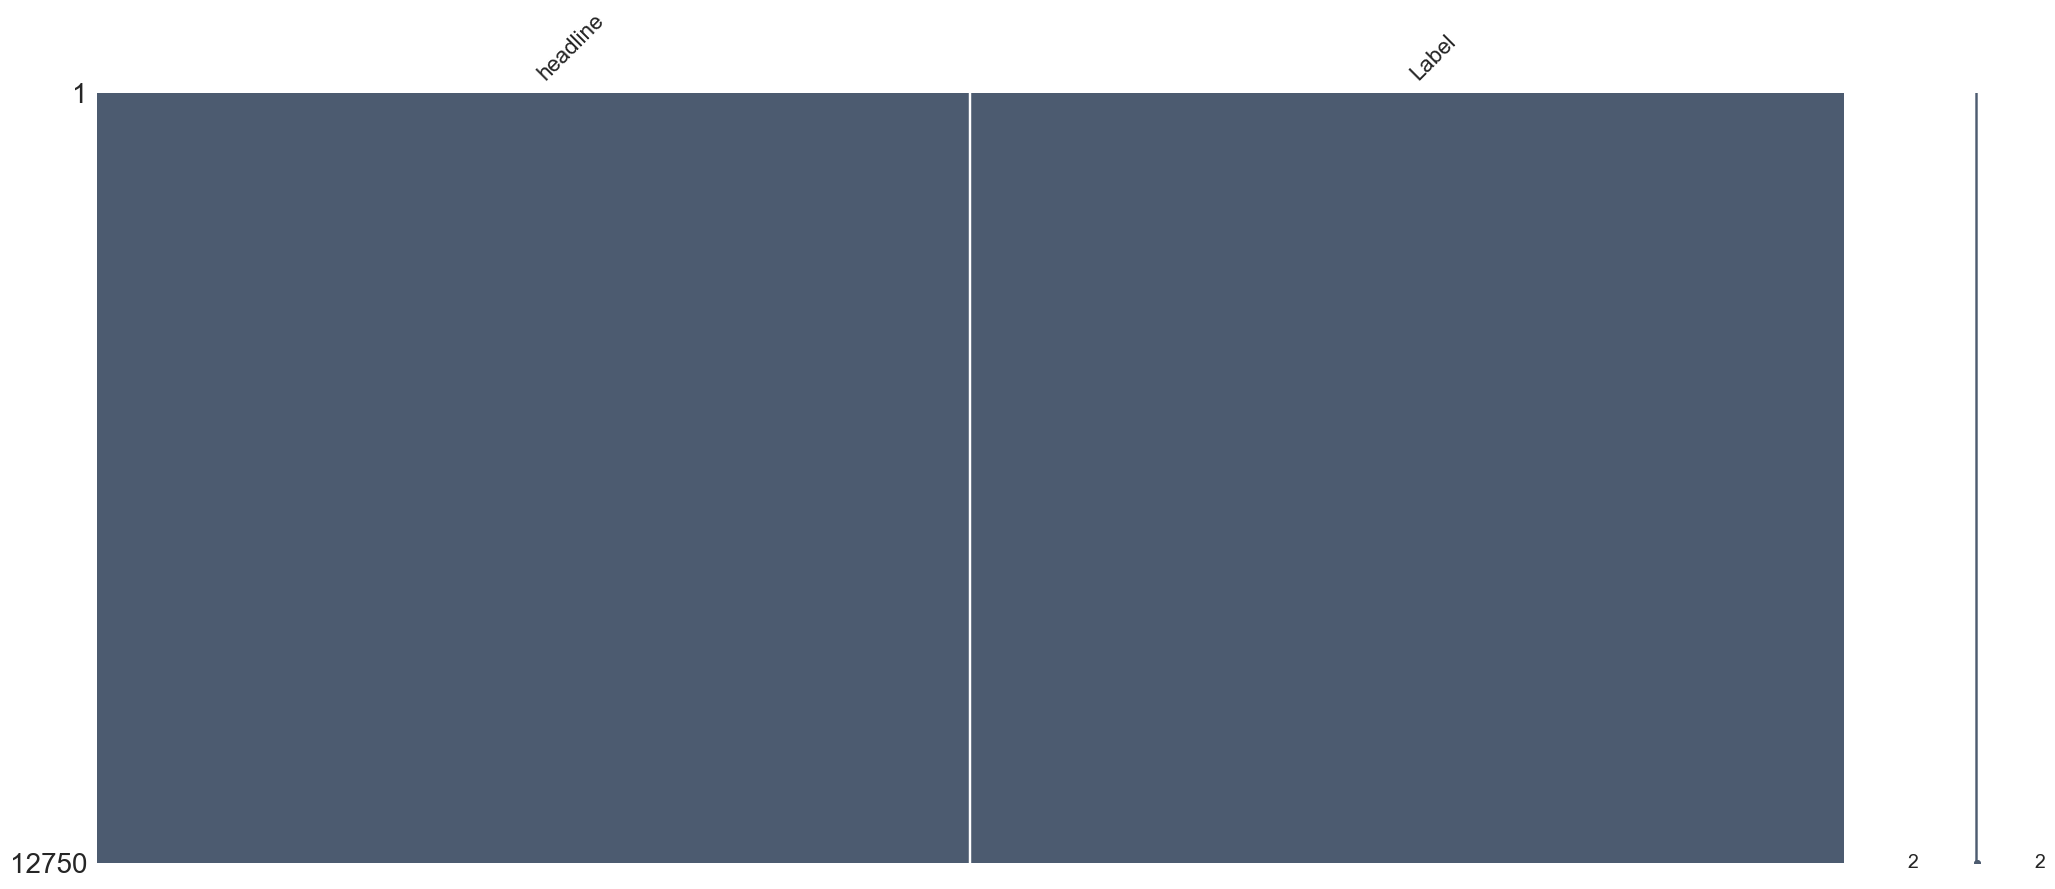

In [12]:
#Missing data as white lines 
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

In [13]:
print('Total headlines in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['Label'].nunique()))

Total headlines in this data: 12750
Total Unique Users in this data: 3


In [14]:
print(df.Label.unique())
print(df.Label.value_counts())

['positive' 'negative' 'neutral']
Label
positive    5739
neutral     4485
negative    2526
Name: count, dtype: int64


In [15]:
def classes_def(x):
    if x ==  0:
        return "negative"
    else:
        return "positive"
    
#df['Label']=df['Label'].apply(lambda x:classes_def(x))
#train['Label']=train['Label'].apply(lambda x:classes_def(x))
#test['Label']=test['Label'].apply(lambda x:classes_def(x))
target=df['Label']

df.Label.value_counts()

Label
positive    5739
neutral     4485
negative    2526
Name: count, dtype: int64

## Class distribution

In [16]:
class_df = df.groupby('Label').count()['headline'].reset_index().sort_values(by='headline',ascending=False)
class_df.style.background_gradient(cmap='winter')

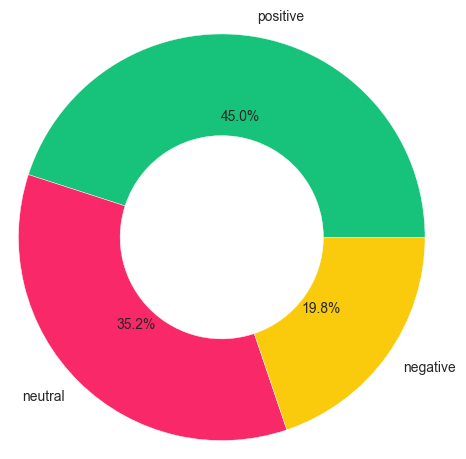

In [17]:
percent_class=class_df.headline
labels= class_df.Label

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

In [18]:
fig=make_subplots(1,2,subplot_titles=('Train set','Test set'))
x=train.Label.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='train'),row=1,col=1)
x=test.Label.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='test'),row=1,col=2)

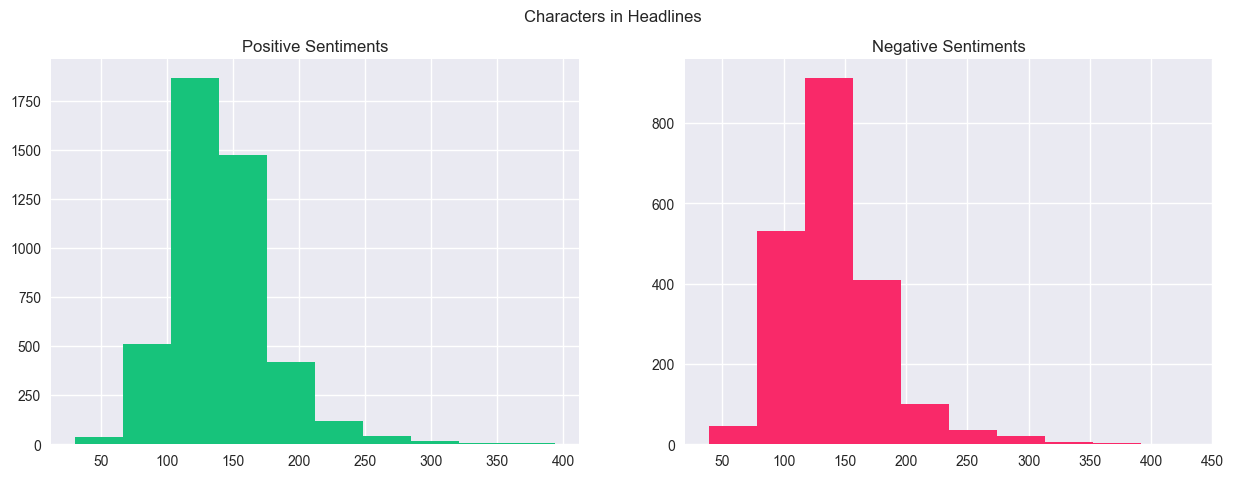

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Label']=="positive"]['headline'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['Label']=="negative"]['headline'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Characters in Headlines')
plt.show()

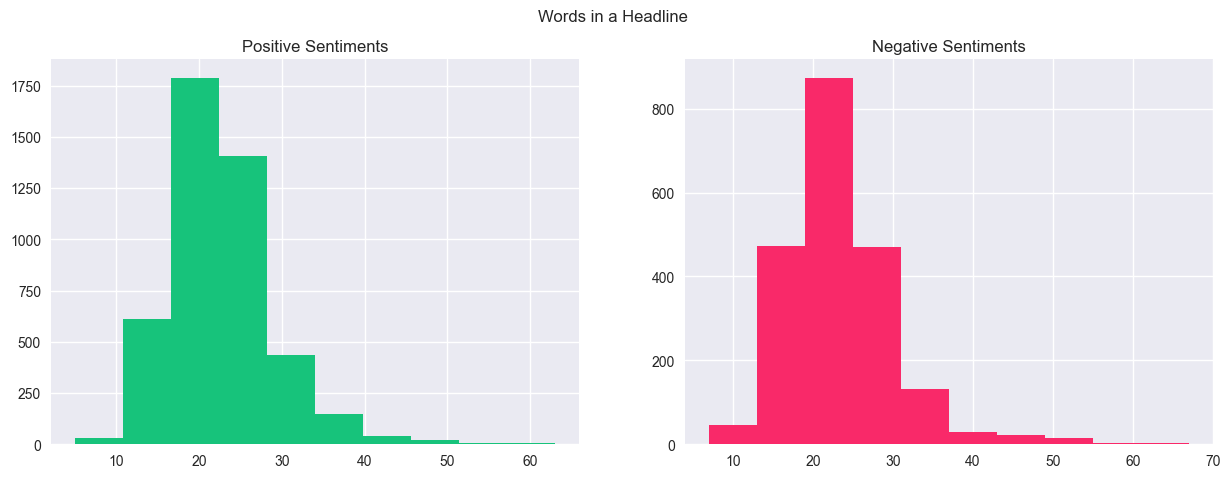

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Label']=="positive"]['headline'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=train[train['Label']=="negative"]['headline'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Words in a Headline')
plt.show()

Text(0.5, 0.98, 'Average word length in each Headline')

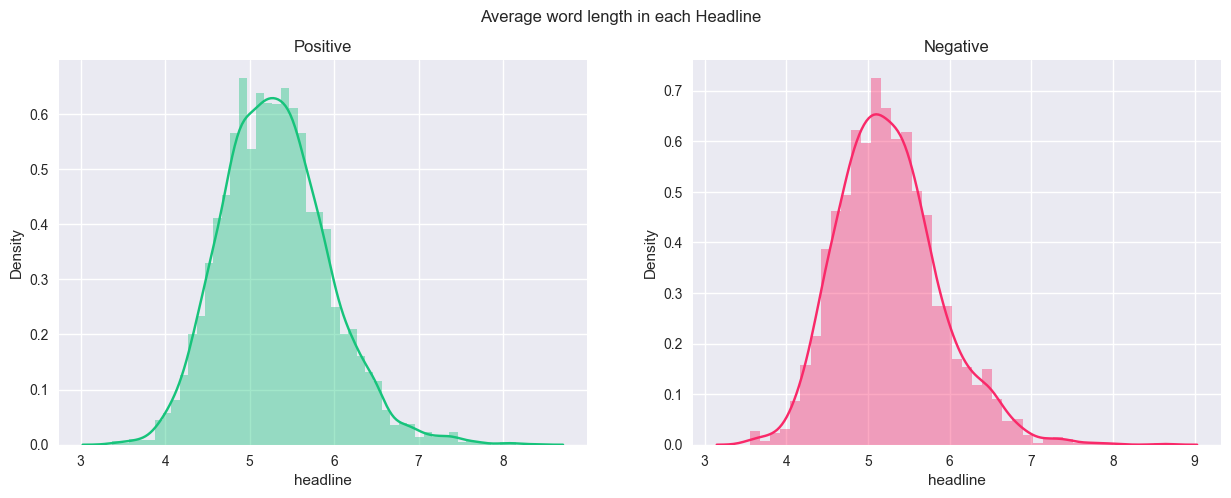

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

word=train[train['Label']=="positive"]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=train[train['Label']=="negative"]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')


fig.suptitle('Average word length in each Headline')

In [22]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['Label']==target ]['headline'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [23]:
np.array(stop)

array({'each', 'herself', 'so', "didn't", "you've", 'if', 'me', 'y', "isn't", 'over', 'now', 'themselves', 'do', 'same', 'yours', 'who', 'of', 'into', 'once', 'them', 'did', 'before', "hadn't", 'o', 'he', 'but', 'be', 'are', 'during', 'both', 'its', 'as', 'on', 'why', 'd', 'nor', 'what', "wasn't", 'doing', 'about', 'out', 'being', 'here', 'more', 'won', "that'll", 'him', 'will', 've', 're', "won't", "shan't", 'under', 'should', "wouldn't", 'didn', 'wouldn', "she's", 'than', 'theirs', 'ma', "doesn't", 'at', 'shan', 'between', 'shouldn', 'to', 'their', 'those', 'too', 'by', 'couldn', 'in', 'his', "it's", 'her', 'll', 'all', 'having', 'our', 'from', 'until', 'has', 'ours', "you're", 'haven', 'itself', 'and', 'while', 'yourselves', 'after', 'below', 'an', 'were', 'hers', 'she', 'any', 'am', 'not', 'only', 'other', 'needn', 'such', 'can', "you'd", 'have', 'through', 'don', 'off', 'a', 'my', 'myself', 'few', 'weren', 'very', "don't", 'm', 'against', 'own', "shouldn't", "weren't", 'most', 'wh

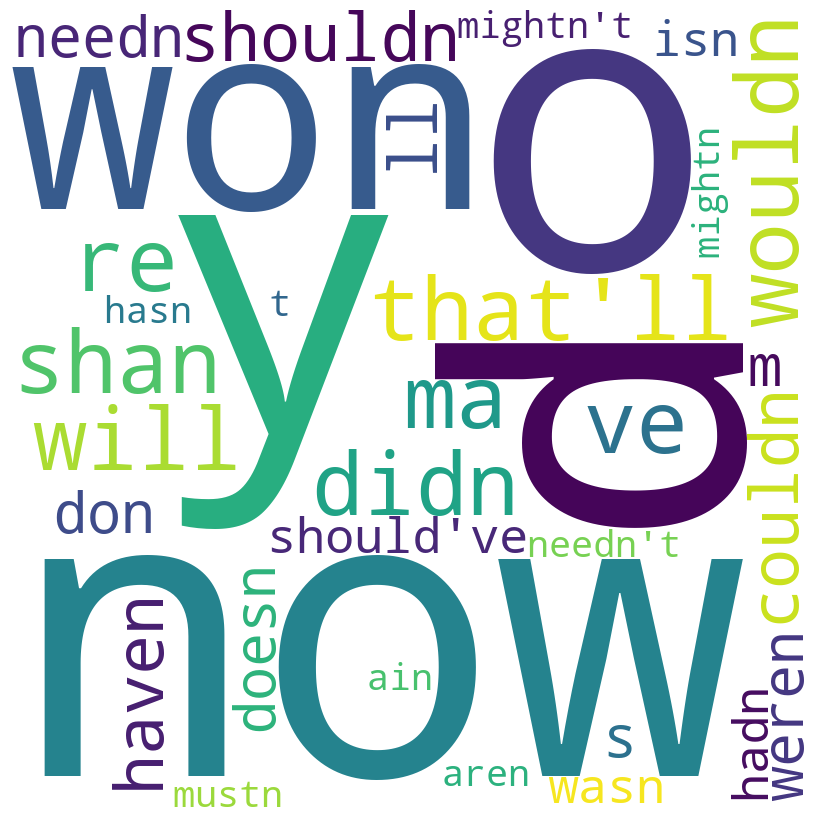

In [24]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<BarContainer object of 10 artists>

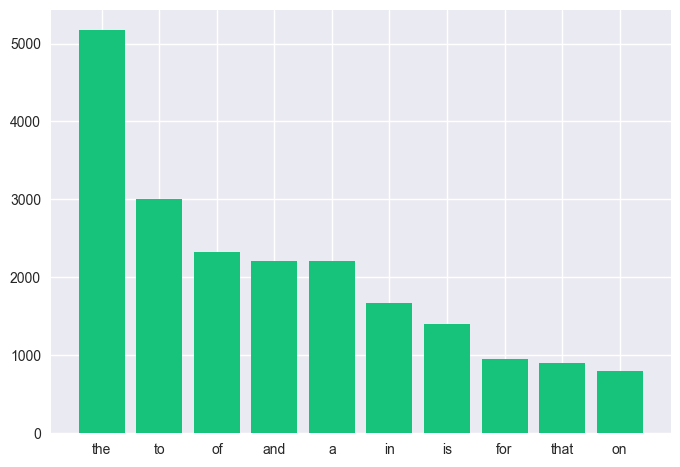

In [25]:
corpus=create_corpus("positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

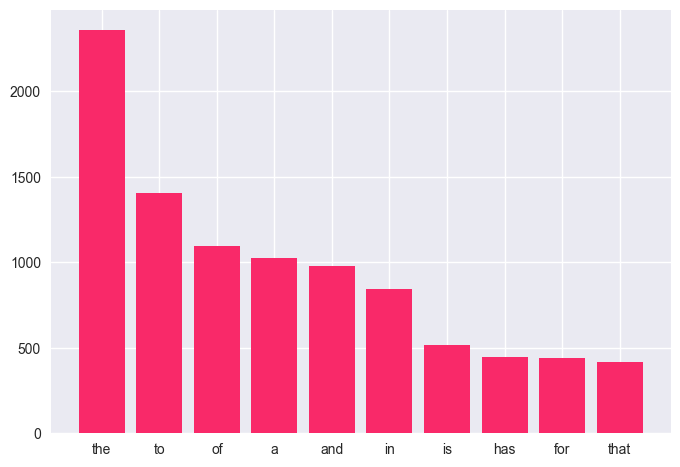

In [26]:
corpus=create_corpus("negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 8 artists>

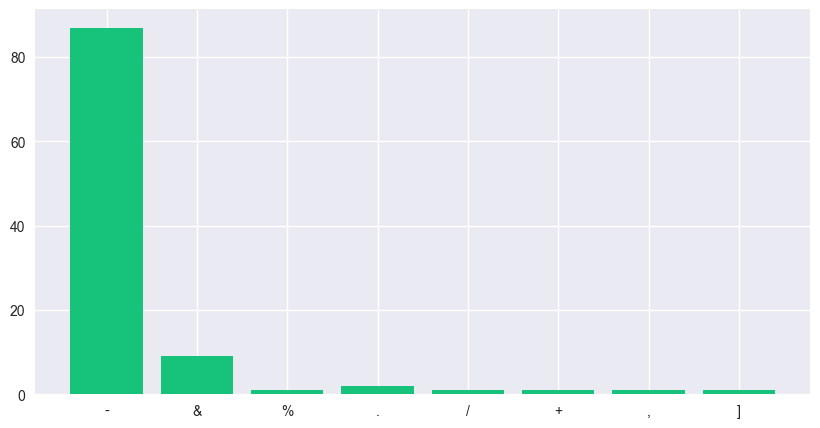

In [27]:
plt.figure(figsize=(10,5))
corpus=create_corpus("positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 4 artists>

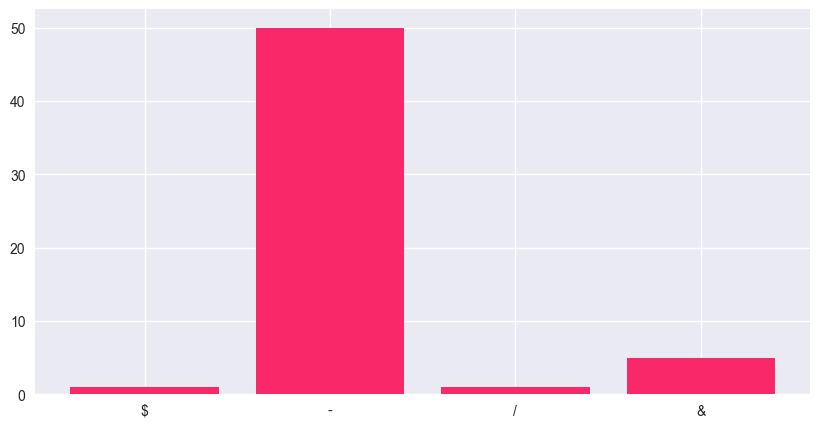

In [28]:
plt.figure(figsize=(10,5))
corpus=create_corpus("negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

In [29]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Axes: >

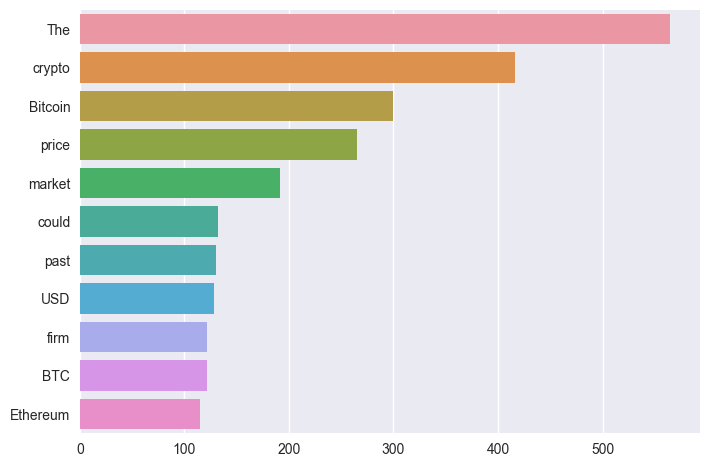

In [30]:
sns.barplot(x=y,y=x)

In [31]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

df['hash']=df['headline'].apply(lambda x:find_hash(x))

temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
#sns.barplot(x="Hashtag",y="count", data = temp)

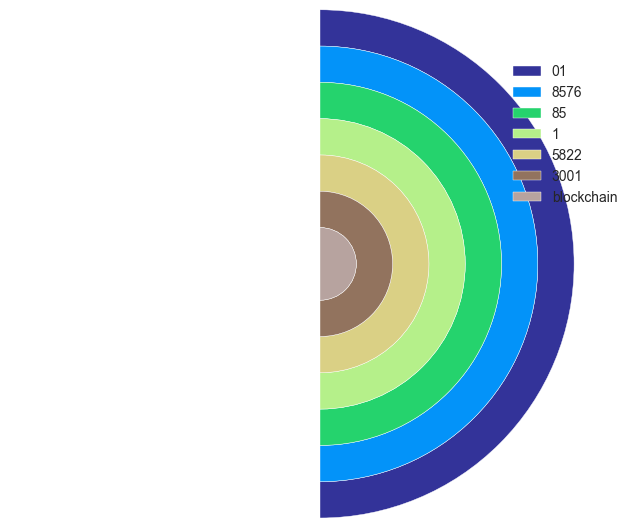

In [32]:
from matplotlib import cm
from math import log10

labels = df['hash'].value_counts()[:][2:11].index.tolist()
data = df['hash'].value_counts()[:][2:11]

df['hash'].value_counts()[:][1:11].index.tolist()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

In [33]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)

df['mentions']=df['headline'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

#sns.barplot(x="Mentions",y="count", data = temp)

In [ ]:
%pip install ipykernel
%pip install --upgrade nbformat

In [35]:
b = df['mentions'].value_counts()[:][1:11].index.tolist()
a = df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Mentions')
fig.show()

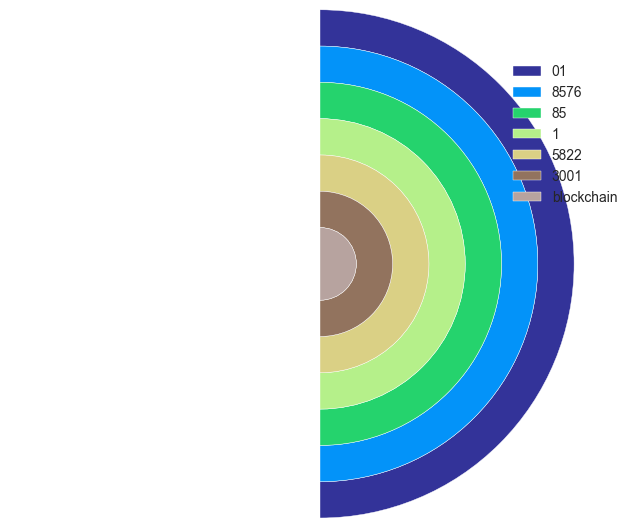

In [36]:
from matplotlib import cm
from math import log10

labels = df['hash'].value_counts()[:][2:11].index.tolist()
data = df['hash'].value_counts()[:][2:11]

df['hash'].value_counts()[:][1:11].index.tolist()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

In [ ]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mentions']=df['headline'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)

In [39]:
b = df['mentions'].value_counts()[:][1:11].index.tolist()
a = df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Mentions')
fig.show()

In [40]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['headline']=df['headline'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['headline']=df['headline'].apply(lambda x:remove_html(x))

In [41]:
# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df['headline']=df['headline'].apply(lambda x:lower(x))

# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['headline']=df['headline'].apply(lambda x:remove_num(x))

In [42]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['headline']=df['headline'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['headline']=df['headline'].apply(lambda x:remove_stopwords(x))

In [43]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['headline']=df['headline'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['headline']=df['headline'].apply(lambda x:remove_hash(x))

In [44]:
#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
def stemming(text):
    ps = PorterStemmer()
    
    return" ".join([ps.stem(word) for word in str(text).split()])
    
def lemmatizing(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    
    return" ".join([wordnet_lemmatizer.lemmatize(word) for word in str(text).split()])
df['headline']=df['headline'].apply(lambda x:remove_space(x))

In [45]:
from collections import Counter
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.headline: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
split_it = comment_words.split()
Counter = Counter(split_it)
number=20
most_occur = Counter.most_common(number)
most_occur

[('crypto', 2643),
 ('bitcoin', 2286),
 ('price', 1538),
 ('usd', 1091),
 ('market', 1061),
 ('new', 944),
 ('ethereum', 922),
 ('btc', 781),
 ('could', 749),
 ('blockchain', 716),
 ('digital', 694),
 ('nft', 679),
 ('said', 665),
 ('million', 548),
 ('cryptocurrency', 544),
 ('trading', 520),
 ('us', 520),
 ('investors', 494),
 ('users', 462),
 ('assets', 450)]

<Axes: xlabel='Word'>

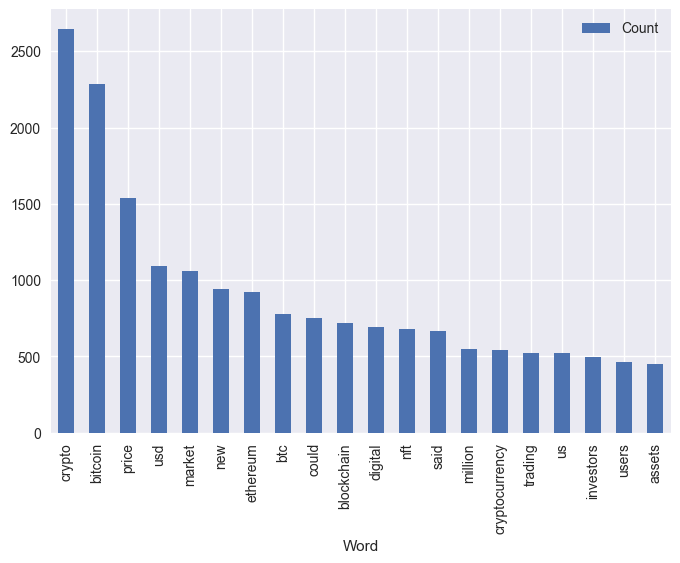

In [46]:
dfm = pd.DataFrame(most_occur, columns = ['Word', 'Count'])
dfm.plot.bar(x='Word',y='Count')

In [47]:
df['headline']=df['headline'].apply(lambda x:stemming(x))

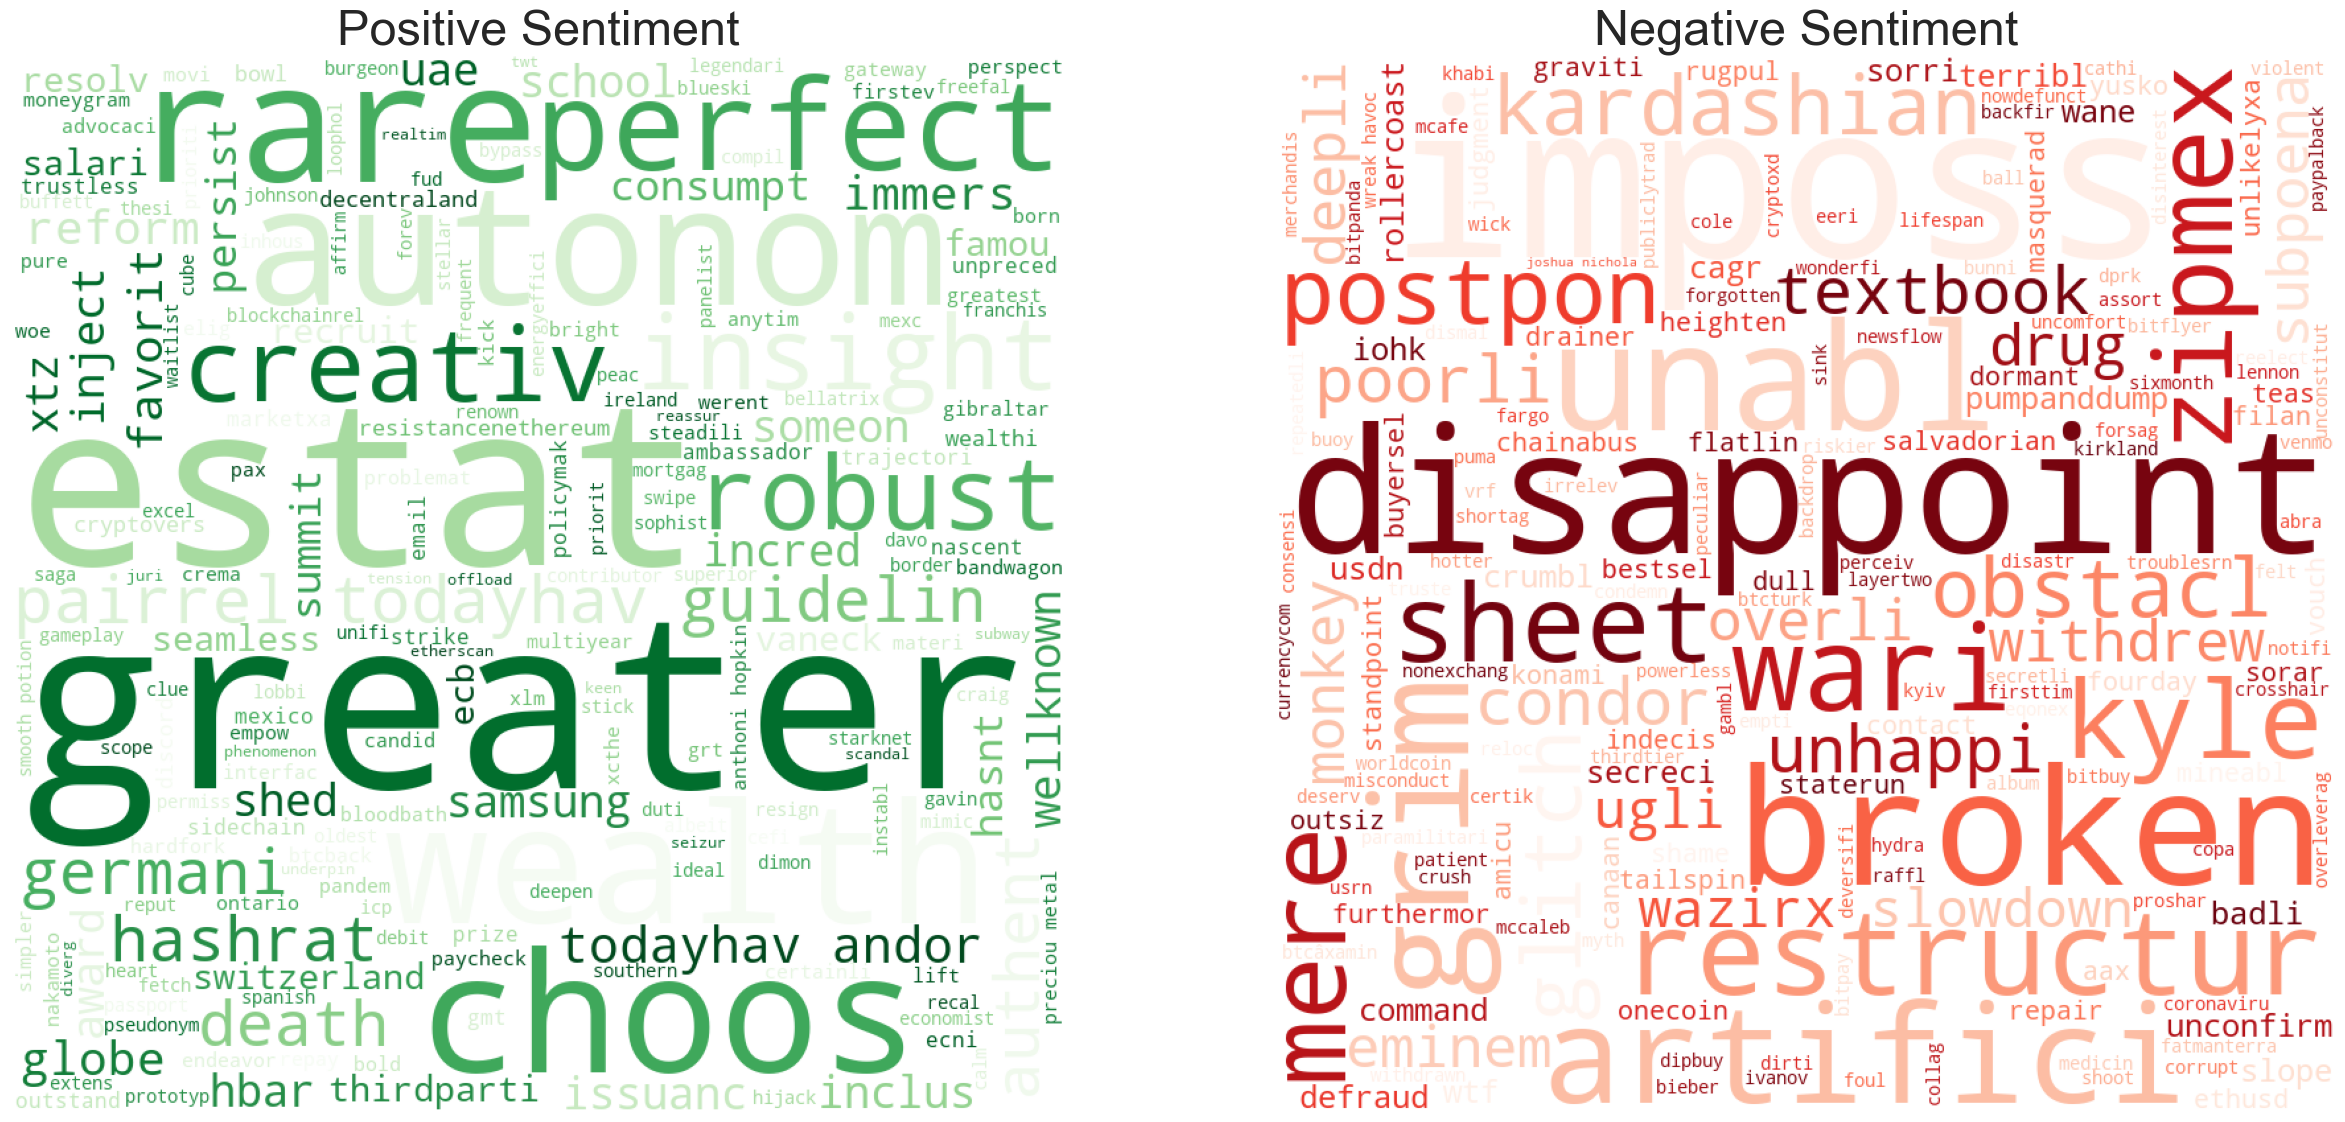

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

df_pos = df[df["Label"]=="positive"]
df_neg = df[df["Label"]=="negative"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.headline: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   
comment_words2 = ''

for val in df_neg.headline: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words2 += " ".join(tokens)+" "
    
words= []
words2= []
tokens=comment_words.split()
tokens2=comment_words2.split()
for x in tokens:
    if x not in comment_words2:
        words.append(x)
        
for x in tokens2:
    if x not in comment_words:
        words2.append(x)

words=   " ".join(words)   
words2=   " ".join(words2)    
    
    
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);



wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(words2)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);


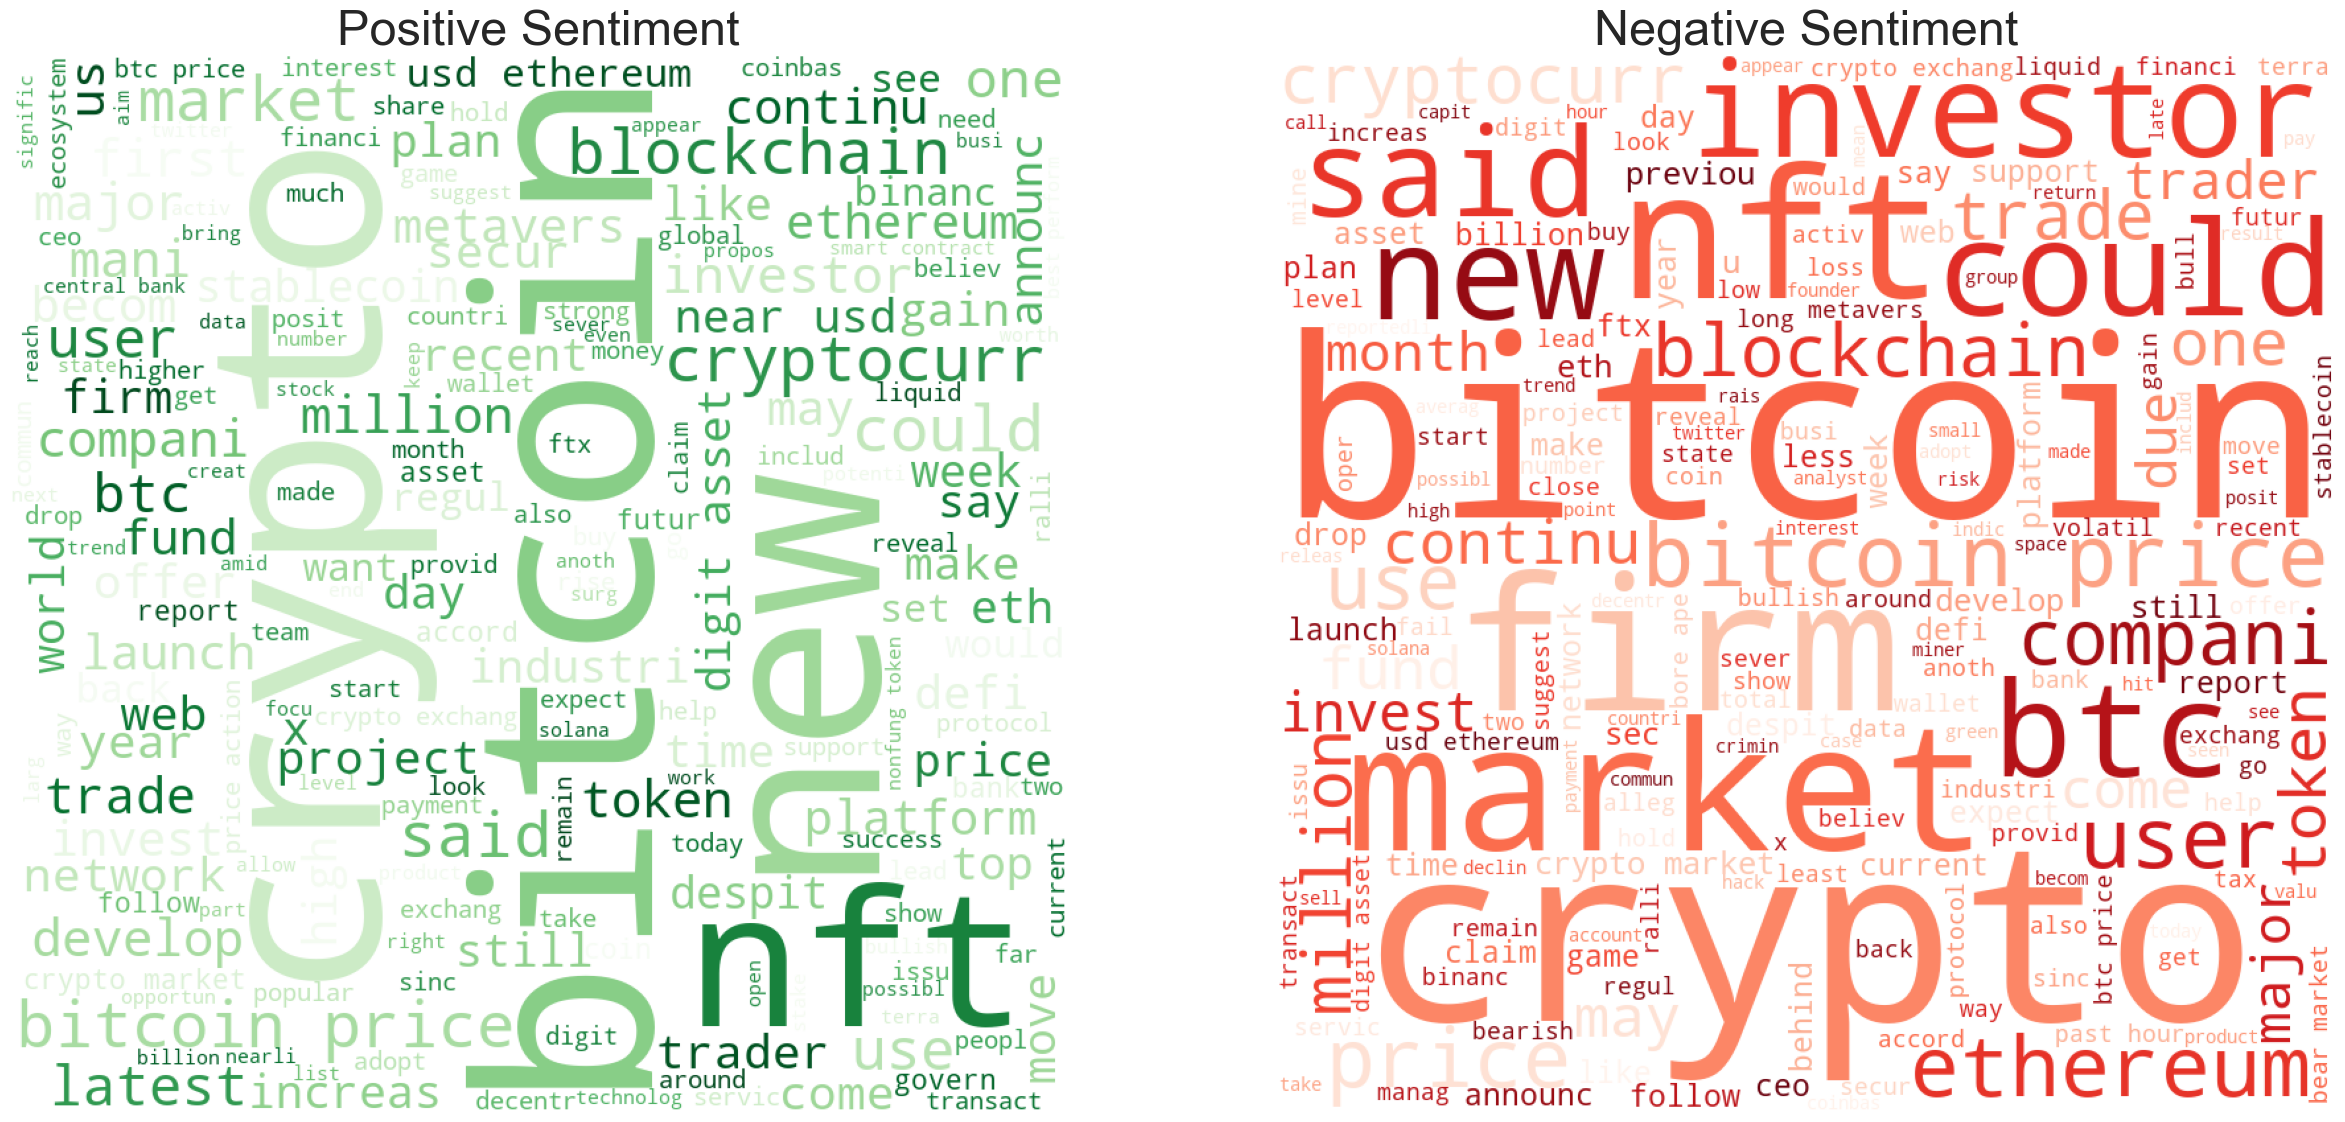

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

df_pos = df[df["Label"]=="positive"]
df_neg = df[df["Label"]=="negative"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.headline: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.headline: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);

In [50]:
del df_pos
del df_neg

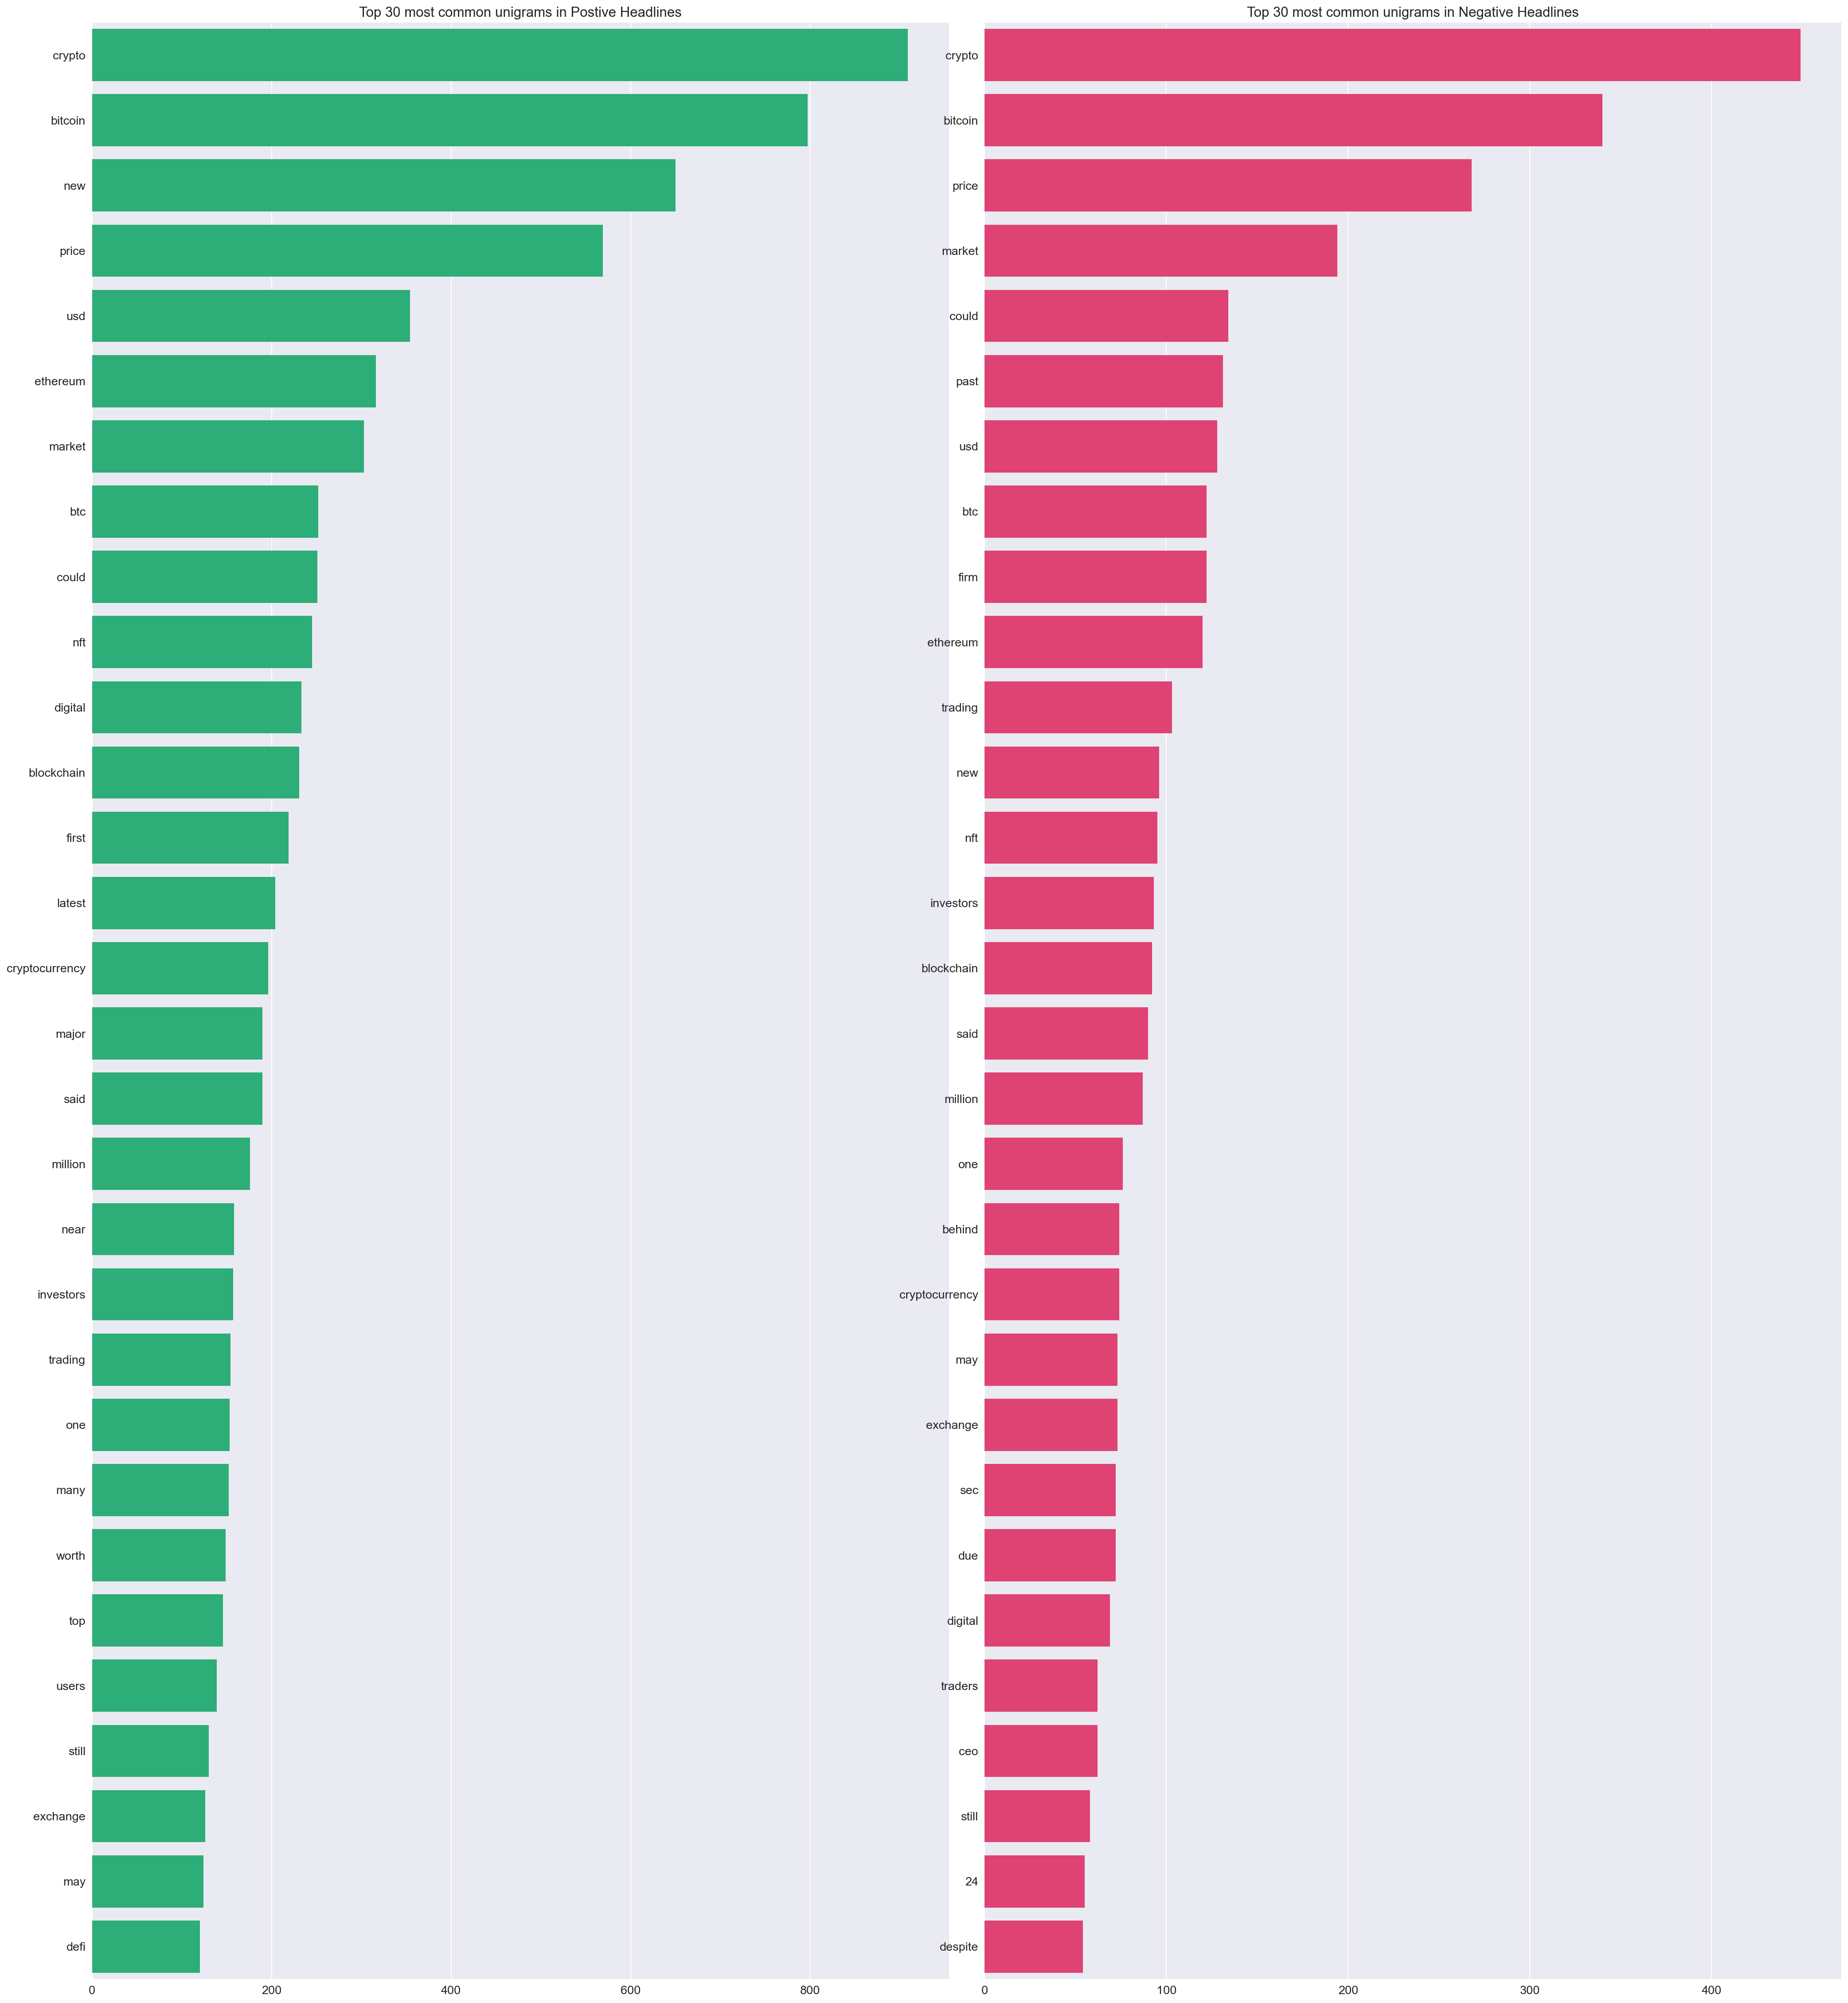

In [51]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30



positive= train["Label"]== "positive"
negative= train["Label"]== "negative"

positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in train[positive]['headline']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in train[negative]['headline']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
      
        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Postive Headlines', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Headlines', fontsize=15)

plt.show()

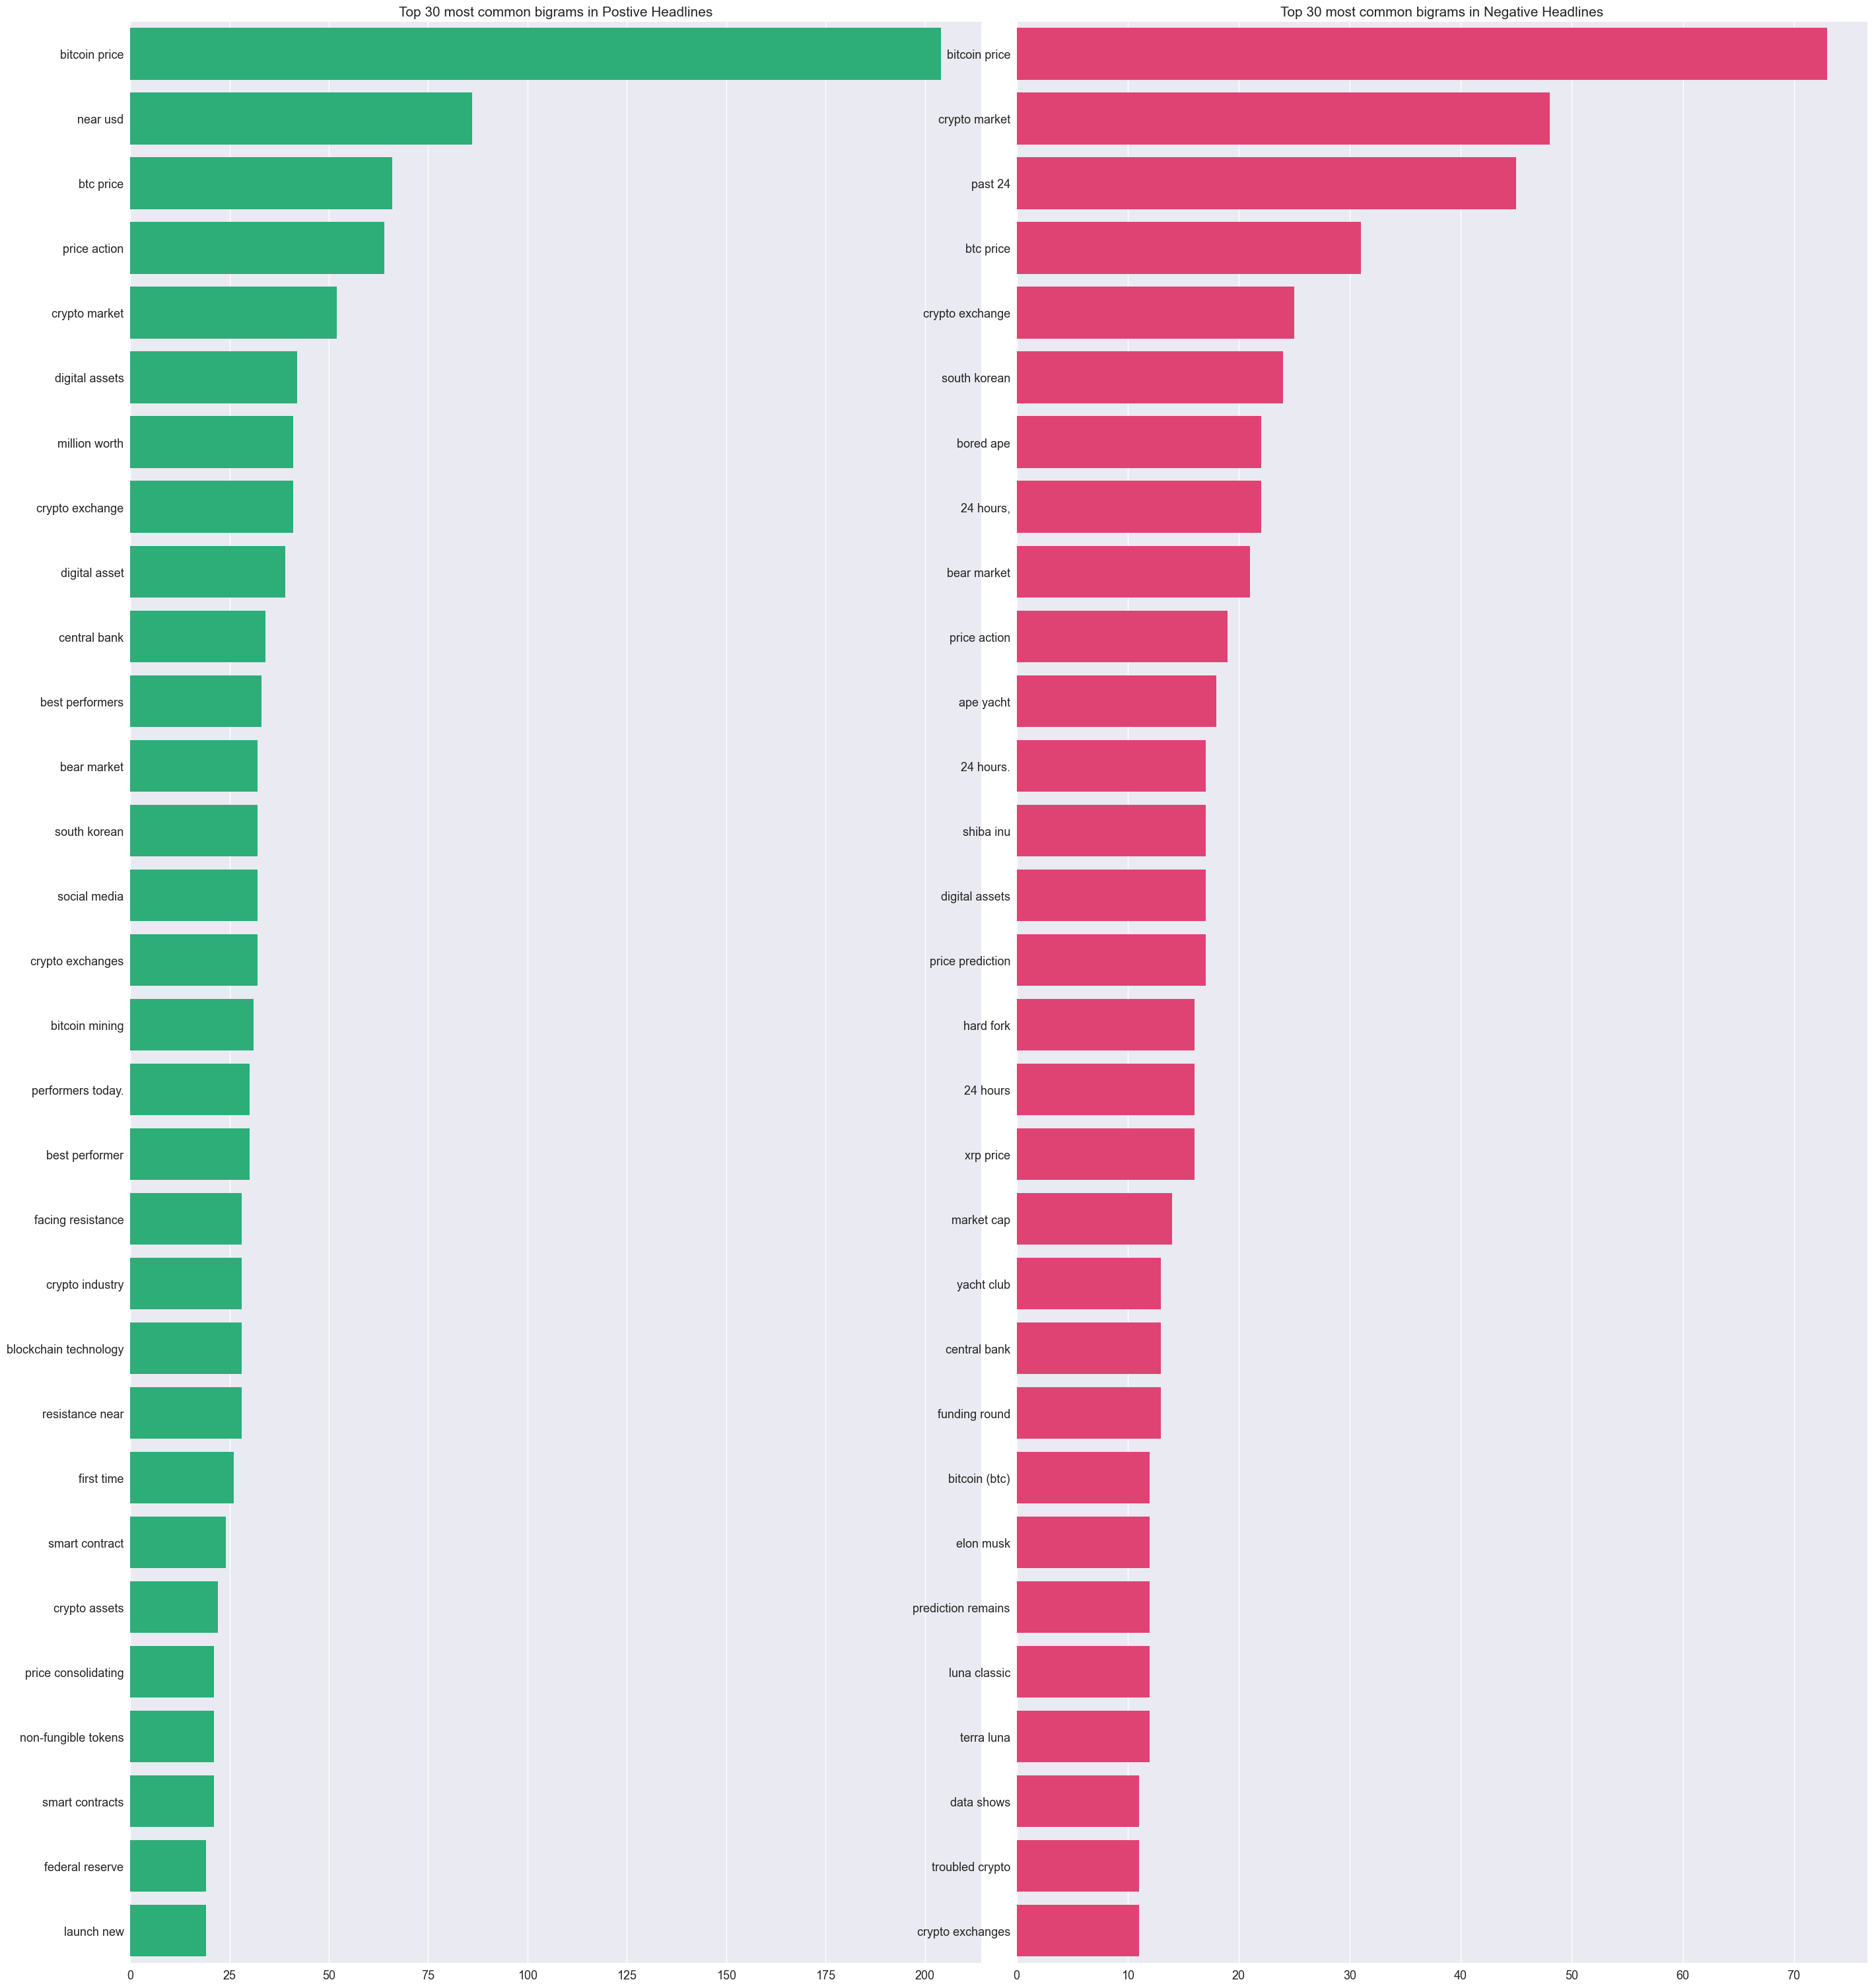

In [52]:
# Bigrams
positive_bigrams = defaultdict(int)

negative_bigrams = defaultdict(int)

for tweet in train[positive]['headline']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in train[negative]['headline']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
        
        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')


for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Postive Headlines', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Headlines', fontsize=15)

plt.show()

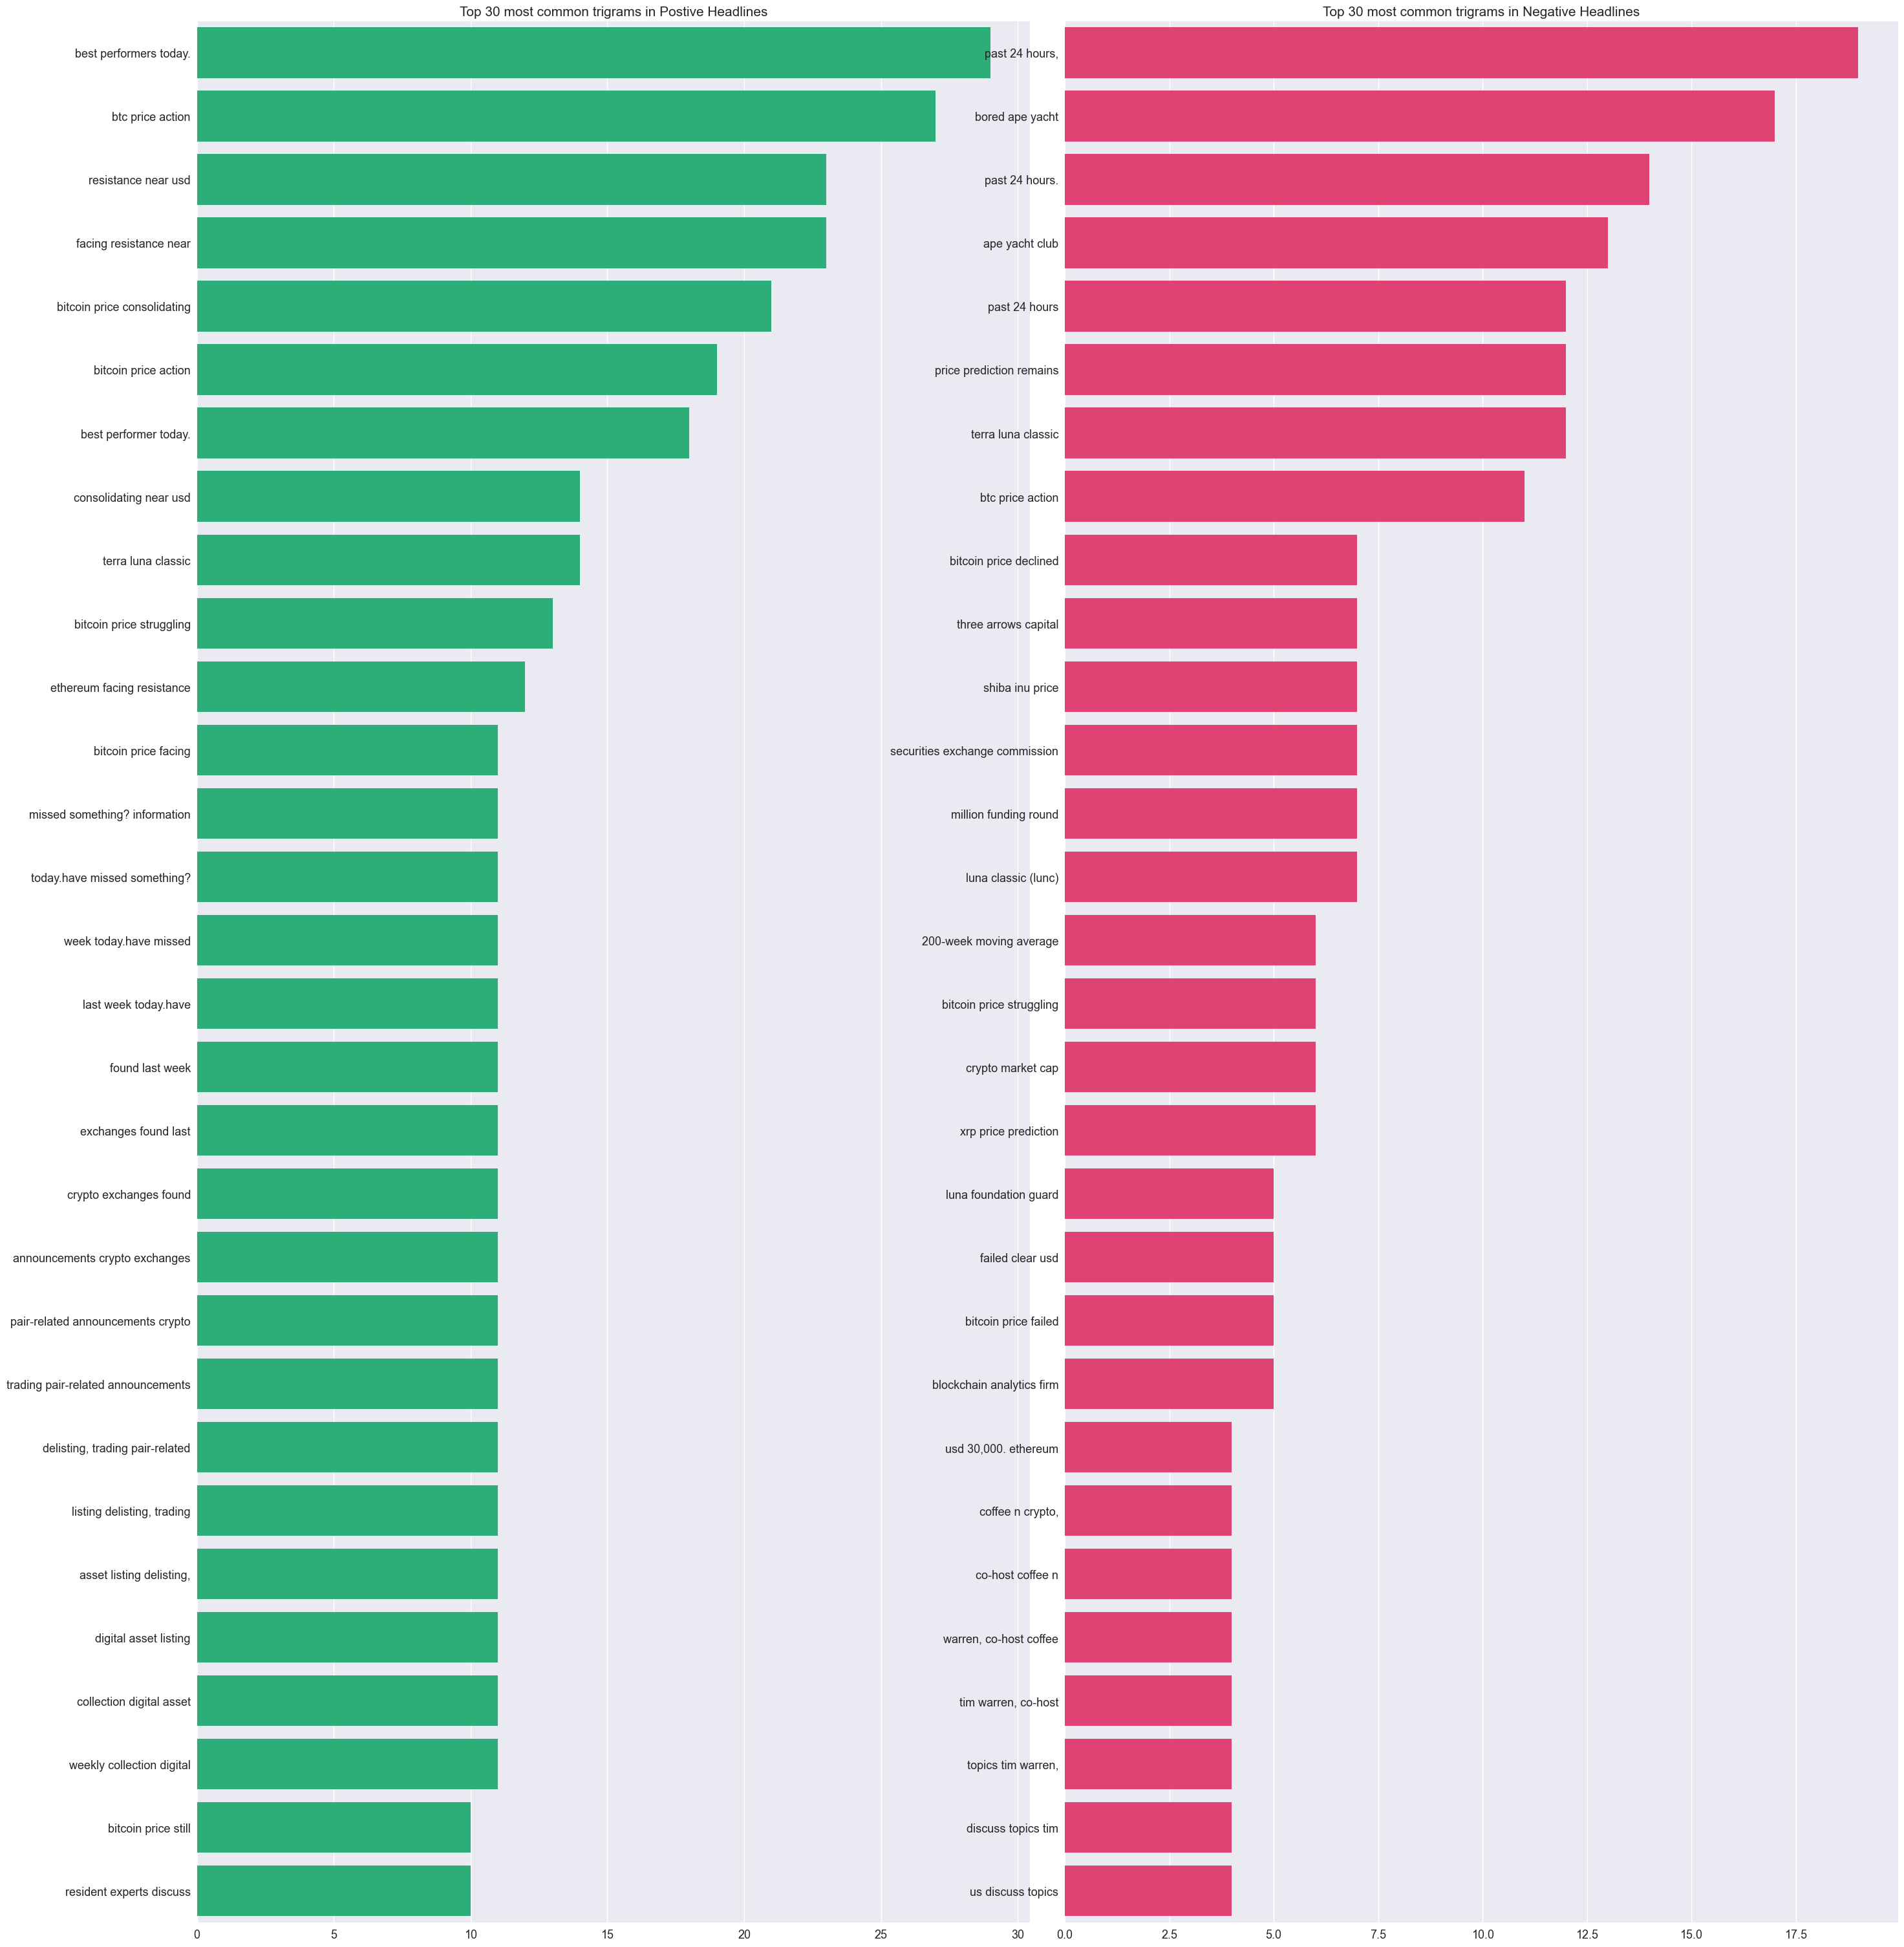

In [53]:
# Trigrams
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in train[positive]['headline']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in train[negative]['headline']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
        
      
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Postive Headlines', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Headlines', fontsize=15)

plt.show()

In [54]:
dffinal=df[["headline","Label"]]
dffinal

headline     Label
0      roster full entertain industri notabl aether g...  positive
1      blockchain analyt firm nansen releas overview ...  negative
2      hardwar wallet firm certain latest uptick dema...  positive
3      kyle davi founder collaps crypto fund three ar...   neutral
4      despit ongo crypto market downturn intensifi c...  positive
...                                                  ...       ...
12745  cream financ cream suffer anoth flash loan attack   neutral
12746  banqu de franc disclos result experiment progr...  positive
12747  advanc project becom xcaâxametaverseâxacompany...  positive
12748   chines compani still top blockchain patent chart   neutral
12749  within littl year celo aim becom fastest among...  positive

[12750 rows x 2 columns]

In [55]:
df

headline     Label hash mentions
0      roster full entertain industri notabl aether g...  positive              
1      blockchain analyt firm nansen releas overview ...  negative              
2      hardwar wallet firm certain latest uptick dema...  positive              
3      kyle davi founder collaps crypto fund three ar...   neutral              
4      despit ongo crypto market downturn intensifi c...  positive              
...                                                  ...       ...  ...      ...
12745  cream financ cream suffer anoth flash loan attack   neutral              
12746  banqu de franc disclos result experiment progr...  positive              
12747  advanc project becom xcaâxametaverseâxacompany...  positive              
12748   chines compani still top blockchain patent chart   neutral              
12749  within littl year celo aim becom fastest among...  positive              

[12750 rows x 4 columns]

In [72]:
crypto_news = pd.read_csv('cryptonews.csv')

In [74]:
crypto_news['sentiment'] = df['Label']

In [ ]:
crypto_news['sentiment']

In [76]:
crypto_news['title'] = df['headline']

In [78]:
crypto_news.to_csv('../archive/cryptonews_sentiment.csv',index=False)

In [56]:
###############here is word2vec to check similarities make sure words exist in the data
nltk.download('punkt')
def wordtovec(sentences):
    data=[]
    for i in sentences:
        temp = []

        # tokenize the sentence into words
        for j in word_tokenize(i):
            temp.append(j.lower())

        data.append(temp)
    return data
    
    
    
data=wordtovec(df['headline'].tolist())
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)

     
print("Cosine similarity between 'hardwar' " +
                 "and 'downturn' - CBOW : ",
      model1.wv.similarity('hardwar', 'downturn'))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)
 

     
print("Cosine similarity between 'suffer' " +
            "and 'flash' - Skip Gram : ",
      model2.wv.similarity('suffer', 'flash'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Cosine similarity between 'hardwar' and 'downturn' - CBOW :  0.978416
Cosine similarity between 'suffer' and 'flash' - Skip Gram :  0.90617895


In [57]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train['headline'].tolist())

In [58]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [59]:
## Predict for the Test Dataset

test_dataset = countvector.transform(test['headline'].tolist())
predictions = randomclassifier.predict(test_dataset)

In [60]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[2064    0    0]
 [   0 3437    0]
 [   0    0 4499]]
1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2064
     neutral       1.00      1.00      1.00      3437
    positive       1.00      1.00      1.00      4499

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [61]:
model =   LinearSVC()
SVC=model.fit(traindataset,train['Label'])

In [62]:
test_dataset = countvector.transform(test['headline'].tolist())
predictions = SVC.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[2064    0    0]
 [   0 3437    0]
 [   0    0 4499]]
1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2064
     neutral       1.00      1.00      1.00      3437
    positive       1.00      1.00      1.00      4499

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [63]:
model =   MultinomialNB()
NB=model.fit(traindataset,train['Label'])

In [64]:
# Save the model as a pickle in a file
joblib.dump(NB, 'sentiment_model.pkl')
  


['sentiment_model.pkl']

In [65]:
new_article = pd.read_csv('../archive/new_news_processed.csv')

In [66]:
new_article.head()

url                                              title                                               text                                               html          author source                       date
0  https://www.coindesk.com/bitcoin-exchange-btc-...  bitcoin exchange btc china temporarily halts t...  BTC China has become the world's first major b...  <p>BTC China has become the world's first majo...    Emily Spaven   news  2013-01-01 00:00:00+00:00
1  https://www.coindesk.com/what-happened-at-the-...             happened us regulators bitcoin meeting  The Bitcoin Foundation's meeting with represen...  <p>The Bitcoin Foundation's <a href="https://w...    Emily Spaven   news  2013-01-01 00:00:00+00:00
2  https://www.coindesk.com/vault-satoshi-expands...  vault satoshi expands canadian bitcoin exchang...  A new Canadian exchange launched this week, of...  <p>A new Canadian exchange launched this week,...  Danny Bradbury   news  2013-01-02 00:00:00+00:00
3  https://www.coindesk.com/what-will-gambling-do...                       gambling bitcoin block chain  What are gambling transactions doing to the bl...  <p>What are gambling transactions doing to the...  Danny Bradbury   news  2013-01-22 00:00:00+00:00
4  https://www.coindesk.com/bitmarkers-move-money...  bitmarkers wants move money bitcoin incasino g...  At first blush, bitcoin and gambling seem like...  <p>At first blush, bitcoin and gambling seem l...   Daniel Cawrey   news  2013-01-26 00:00:00+00:00

In [ ]:
test_dataset = countvector.transform(test['headline'].tolist())
predictions = NB.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[2041    1   22]
 [   1 3403   33]
 [   1    3 4495]]
0.9939
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      2064
     neutral       1.00      0.99      0.99      3437
    positive       0.99      1.00      0.99      4499

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
new_dataset = countvector.transform(new_article['title'].tolist())

In [68]:
new_dataset

<15350x103161 sparse matrix of type '<class 'numpy.int64'>'
	with 19122 stored elements in Compressed Sparse Row format>

In [69]:
# Load the model from the file
sentiment_model = joblib.load('sentiment_model.pkl')
  
# Use the loaded model to make predictions
new_article['sentiment'] = sentiment_model.predict(new_dataset)

In [70]:
new_article['sentiment']

0         neutral
1         neutral
2        positive
3        positive
4         neutral
           ...   
15345     neutral
15346    positive
15347    negative
15348     neutral
15349    positive
Name: sentiment, Length: 15350, dtype: object

In [71]:
new_article.to_csv('../archive/new_news_processed_sentiment.csv',index=False)

In [88]:
new_prediction = NB.predict(new_dataset)

In [89]:
new_prediction

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [90]:
new_article['sentiment'] = new_prediction

In [91]:
new_article

Unnamed: 0                                              title sentiment
0               0  bitcoin exchang btc china temporarili halt tra...  positive
1               1                       happen us regul bitcoin meet  positive
2               2  vault satoshi expand canadian bitcoin exchang ...  positive
3               3                          gambl bitcoin block chain  positive
4               4     bitmark want move money bitcoin incasino gambl   neutral
...           ...                                                ...       ...
15459       15459            block inc nysesq q earn call transcript  positive
15460       15460            fidel vs robinhood invest platform best  positive
15461       15461                                  fastestvpn review  positive
15462       15462  kur de xtracker msci world etf c weist nach sã...  positive
15463       15463         coinbas global coin q earn call transcript  positive

[15464 rows x 3 columns]